In [141]:
import matplotlib.pyplot as plt
from jax.random import PRNGKey, split
import jax.numpy as jnp

from jax import config
config.update("jax_enable_x64", True)

from data import generate_data, generate_observation_matrix
from loss import create_loss
from network import init_net_orth, init_net_spec, compute_end_to_end, compute_factor, compress_network
from solver import train
from utils import compose, svd

In [142]:
key = PRNGKey(0)

# Simulated Data
r = 2
d = 100

key, subkey = split(key)
target = generate_data(key=subkey, shape=(d, d), rank=r)

key, subkey = split(key)
percent_observed = 0.08
mask = generate_observation_matrix(key=subkey, percent_observed=percent_observed, shape=(d, d))

train_loss_fn = create_loss(target, mask=mask)
test_loss_fn = create_loss(target, mask=1-mask)
train_e2e_loss_fn = compose(train_loss_fn, compute_end_to_end)
test_e2e_loss_fn = compose(test_loss_fn, compute_end_to_end)

tol = 1e-14
n_outer_loops = 10000

## 3-layer random orthogonal, full width

In [143]:
# Deep Network
input_dim = d
output_dim = d
width = d
depth = 3
init_scale = 1e-4

key, subkey = split(key)
init_weights = init_net_orth(
    key=subkey, 
    input_dim=input_dim, 
    output_dim=output_dim, 
    width=width, 
    depth=depth, 
    init_scale=init_scale
)

step_size = 1e3

In [144]:
result = train(
    init_weights=init_weights,
    train_e2e_loss_fn=train_e2e_loss_fn,
    n_outer_loops=n_outer_loops,
    step_size=step_size,
    test_e2e_loss_fn=test_e2e_loss_fn,
    tol=tol
)

  0%|          | 0/10000 [00:00<?, ?it/s]

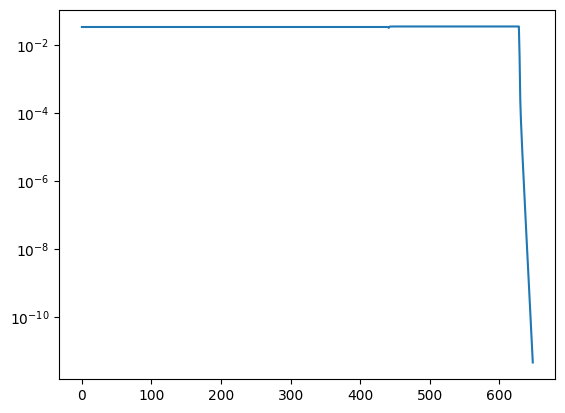

In [145]:
plt.semilogy(result['test_loss'])

## 2-layer random orthogonal, width=r

In [146]:
# Deep Network
input_dim = d
output_dim = d
width = r
depth = 2
init_scale = 1e-4

key, subkey = split(key)
init_weights = init_net_orth(
    key=subkey, 
    input_dim=input_dim, 
    output_dim=output_dim, 
    width=width, 
    depth=depth, 
    init_scale=init_scale
)

step_size = 3e2
n_outer_loops = 1000

In [147]:
result = train(
    init_weights=init_weights,
    train_e2e_loss_fn=train_e2e_loss_fn,
    n_outer_loops=n_outer_loops,
    step_size=step_size,
    test_e2e_loss_fn=test_e2e_loss_fn,
    tol=tol
)

  0%|          | 0/1000 [00:00<?, ?it/s]

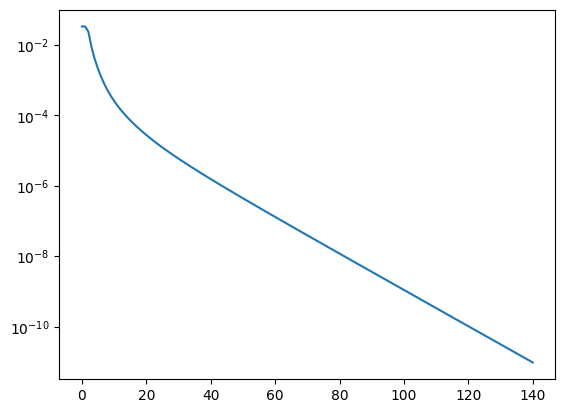

In [148]:
plt.semilogy(result['test_loss'])

## 2-layer random orthogonal, full width

In [96]:
# Deep Network
input_dim = d
output_dim = d
width = d
depth = 2
init_scale = 1e-3

key, subkey = split(key)
init_weights = init_net_orth(
    key=subkey, 
    input_dim=input_dim, 
    output_dim=output_dim, 
    width=width, 
    depth=depth, 
    init_scale=init_scale
)

tol = 1e-10
step_size = 1e3
n_outer_loops = 1000

In [97]:
result = train(
    init_weights=init_weights,
    train_e2e_loss_fn=train_e2e_loss_fn,
    n_outer_loops=n_outer_loops,
    step_size=step_size,
    test_e2e_loss_fn=test_e2e_loss_fn,
    tol=tol
)

  0%|          | 0/1000 [00:00<?, ?it/s]

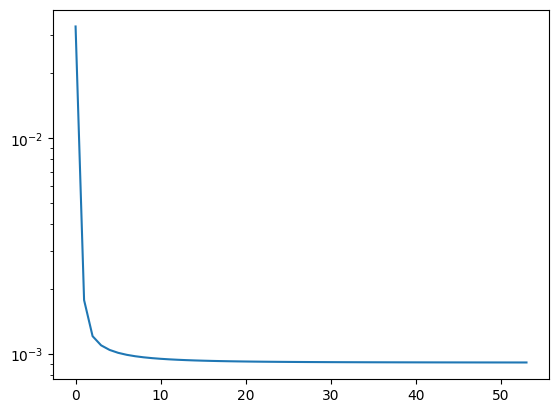

In [61]:
plt.semilogy(result['test_loss'])

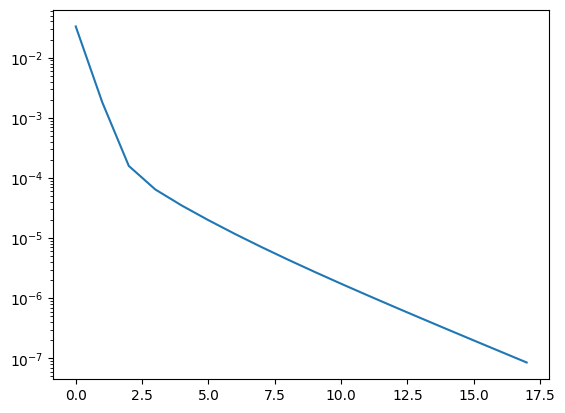

In [91]:
plt.semilogy(result['test_loss'])

## 3-layer orthogonal, width=2r

In [85]:
# Deep Network
input_dim = d
output_dim = d
width = 2*r
depth = 3
init_scale = 1e-3

key, subkey = split(key)
init_weights = init_net_orth(
    key=subkey, 
    input_dim=input_dim, 
    output_dim=output_dim, 
    width=width, 
    depth=depth, 
    init_scale=init_scale
)

tol = 1e-10
step_size = 1e3
n_outer_loops = 1000

In [86]:
result = train(
    init_weights=init_weights,
    train_e2e_loss_fn=train_e2e_loss_fn,
    n_outer_loops=n_outer_loops,
    step_size=step_size,
    test_e2e_loss_fn=test_e2e_loss_fn,
    tol=tol
)

  0%|          | 0/1000 [00:00<?, ?it/s]

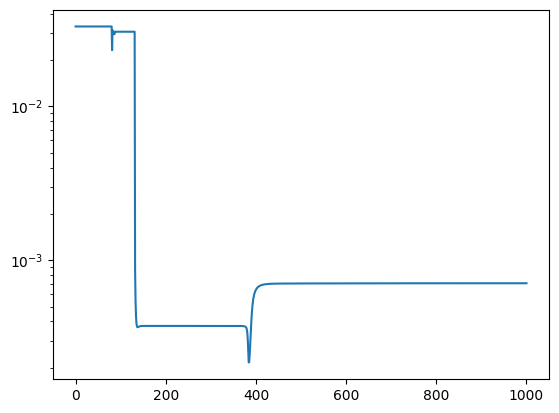

In [87]:
plt.semilogy(result['test_loss'])